## Import Libaries

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from IPython.display import display

# for date manipulation
from datetime import datetime

# for visualization: matplotlib
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
# to display visuals in the notebook

# for visualization: seaborn
import seaborn as sns
sns.set_context(font_scale=2)

# for visualization: plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import iplot


# to cleanup memory usage
import gc

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from os import path
home = path.abspath(path.join("__file__",".."))
print(home)

# Any results you write to the current directory are saved as output.

/Users/anniecondon/Documents/hackathon/climate_change_hackathon.nosync/notebooks


## Read in data to dataframes

Read in hourly demand data for Tampa for 2017, 2018, and 2019 - Source = PUDL

In [2]:
ferc714_hourly_demand_tampa = pd.read_csv(home + '/tampa_electric_co_demand_hourly.csv')

In [3]:
ferc714_hourly_demand_tampa

Unnamed: 0  respondent_id_ferc714          report_date  \
0          426228                    262  2014-01-01 00:00:00   
1         1046371                    262  2014-01-01 00:00:00   
2         1666514                    262  2014-01-01 00:00:00   
3         2286657                    262  2014-01-01 00:00:00   
4         2906800                    262  2014-01-01 00:00:00   
...           ...                    ...                  ...   
52579    12391179                    262  2019-01-01 00:00:00   
52580    13011322                    262  2019-01-01 00:00:00   
52581    13631465                    262  2019-01-01 00:00:00   
52582    14251608                    262  2019-01-01 00:00:00   
52583    14871751                    262  2019-01-01 00:00:00   

              utc_datetime          timezone  demand_mwh  
0      2014-01-01 05:00:00  America/New_York    1510.000  
1      2014-01-01 06:00:00  America/New_York    1428.000  
2      2014-01-01 07:00:00  America/New_York    1378.000  
3      2014-01-01 08:00:00  America/New_York    1324.000  
4      2014-01-01 09:00:00  America/New_York    1326.000  
...                    ...               ...         ...  
52579  2020-01-01 00:00:00  America/New_York    2106.000  
52580  2020-01-01 01:00:00  America/New_York    1988.000  
52581  2020-01-01 02:00:00  America/New_York    1868.000  
52582  2020-01-01 03:00:00  America/New_York    1762.000  
52583  2020-01-01 04:00:00  America/New_York    1698.000  

[52584 rows x 6 columns]

Read in hourly weather data for Tampa for 2017, 2018, and 2019 - Source = NSRDB

In [4]:
import os
import csv

# fields = []
# rows = []

# for filename in os.listdir(home + '/tampa_weather_data_2017_2019/'):
#     print(filename)
#     #filename = pd.read_csv(os.path.join(home + '/tampa_weather_data_2017_2019/', filename)

import pandas as pd
import glob

path = home + '/tampa_weather_data_2014-2018/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, skiprows = [0,1])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
frame.head(10)

Year  Month  Day  Hour  Minute  DHI  DNI  Dew Point  Surface Albedo  \
0  2014      1    1     0      30    0    0     10.000           0.144   
1  2014      1    1     1      30    0    0     11.000           0.144   
2  2014      1    1     2      30    0    0     11.000           0.144   
3  2014      1    1     3      30    0    0     12.000           0.144   
4  2014      1    1     4      30    0    0     12.000           0.144   
5  2014      1    1     5      30    0    0     12.000           0.144   
6  2014      1    1     6      30    0    0     13.000           0.144   
7  2014      1    1     7      30    0    0     13.000           0.144   
8  2014      1    1     8      30    0    0     13.000           0.144   
9  2014      1    1     9      30    0    0     14.000           0.144   

   Wind Speed  Relative Humidity  Temperature  Pressure  Unnamed: 13  
0       3.000             66.690       17.000      1020          NaN  
1       3.000             68.850       16.000      1020          NaN  
2       3.000             75.900       16.000      1020          NaN  
3       3.100             78.420       16.000      1020          NaN  
4       3.100             80.390       16.000      1020          NaN  
5       3.300             87.650       15.000      1020          NaN  
6       3.500             89.740       15.000      1010          NaN  
7       3.700             91.620       15.000      1010          NaN  
8       3.900             93.530       15.000      1010          NaN  
9       4.000             95.350       15.000      1010          NaN

In [6]:
frame.shape

(5518800, 14)

In [7]:
frame_group_by_date = frame.groupby(['Year','Month','Day','Hour','Minute']).mean()

In [8]:
frame_group_by_date = frame_group_by_date.reset_index()

In [9]:
frame_group_by_date.head(100)

Year  Month  Day  Hour  Minute   DHI   DNI  Dew Point  Surface Albedo  \
0   2014      1    1     0      30 0.000 0.000     10.548           0.107   
1   2014      1    1     1      30 0.000 0.000     11.048           0.107   
2   2014      1    1     2      30 0.000 0.000     11.183           0.107   
3   2014      1    1     3      30 0.000 0.000     12.000           0.107   
4   2014      1    1     4      30 0.000 0.000     12.016           0.107   
..   ...    ...  ...   ...     ...   ...   ...        ...             ...   
95  2014      1    4    23      30 0.000 0.000     13.397           0.107   
96  2014      1    5     0      30 0.000 0.000     13.929           0.107   
97  2014      1    5     1      30 0.000 0.000     14.087           0.107   
98  2014      1    5     2      30 0.000 0.000     14.444           0.107   
99  2014      1    5     3      30 0.000 0.000     15.000           0.107   

    Wind Speed  Relative Humidity  Temperature  Pressure  Unnamed: 13  
0        2.964             68.401       16.968  1020.000          NaN  
1        2.957             73.235       16.341  1020.000          NaN  
2        2.957             75.846       16.135  1020.000          NaN  
3        3.050             78.670       15.984  1020.000          NaN  
4        3.050             82.956       15.579  1020.000          NaN  
..         ...                ...          ...       ...          ...  
95       1.864             86.568       16.389  1014.127          NaN  
96       1.950             89.031       16.111  1015.476          NaN  
97       2.129             91.573       16.016  1015.000          NaN  
98       2.314             94.233       15.976  1013.413          NaN  
99       2.414             97.334       15.905  1010.000          NaN  

[100 rows x 14 columns]

In [10]:
frame_group_by_date['date_time'] = pd.to_datetime(frame_group_by_date[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [11]:
frame_group_by_date['date_time'].head()

0   2014-01-01 00:30:00
1   2014-01-01 01:30:00
2   2014-01-01 02:30:00
3   2014-01-01 03:30:00
4   2014-01-01 04:30:00
Name: date_time, dtype: datetime64[ns]

In [12]:
# #1007112
# site_1007112_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007112_27.97_-82.62_2017.csv')
# site_1007112_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007112_27.97_-82.62_2018.csv')
# site_1007112_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007112_27.97_-82.62_2019.csv')
# #1007223
# site_1007223_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007223_27.93_-82.62_2017.csv')
# site_1007223_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007223_27.93_-82.62_2018.csv')
# site_1007223_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007223_27.93_-82.62_2019.csv')
# #1007284
# site_1007284_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007284_27.81_-82.62_2017.csv')
# site_1007284_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007284_27.81_-82.62_2018.csv')
# site_1007284_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007284_27.81_-82.62_2019.csv')
# #1007293
# site_1007293_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007293_27.89_-82.62_2017.csv')
# site_1007293_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007293_27.89_-82.62_2018.csv')
# site_1007293_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007293_27.89_-82.62_2019.csv')
# #1007425
# site_1007425_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007425_28.09_-82.62_2017.csv')
# site_1007425_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007425_28.09_-82.62_2018.csv')
# site_1007425_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007425_28.09_-82.62_2019.csv')
# #1007629
# site_1007629_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007629_28.05_-82.62_2017.csv')
# site_1007629_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007629_28.05_-82.62_2018.csv')
# site_1007629_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007629_28.05_-82.62_2019.csv')
# #1007767
# site_1007767_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007767_28.01_-82.62_2017.csv')
# site_1007767_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007767_28.01_-82.62_2018.csv')
# site_1007767_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007767_28.01_-82.62_2019.csv')
# #1007814
# site_1007814_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007814_27.85_-82.62_2017.csv')
# site_1007814_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007814_27.85_-82.62_2018.csv')
# site_1007814_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007814_27.85_-82.62_2019.csv')
# #1007897
# site_1007897_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007897_28.09_-82.58_2017.csv')
# site_1007897_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007897_28.09_-82.58_2018.csv')
# site_1007897_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1007897_28.09_-82.58_2019.csv')
# #1008118
# site_1008118_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008118_27.97_-82.58_2017.csv')
# site_1008118_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008118_27.97_-82.58_2018.csv')
# site_1008118_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008118_27.97_-82.58_2019.csv')
# #1008398
# site_1008398_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008398_28.01_-82.58_2017.csv')
# site_1008398_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008398_28.01_-82.58_2018.csv')
# site_1008398_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008398_28.01_-82.58_2019.csv')
# #1008401
# site_1008401_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008401_28.05_-82.58_2017.csv')
# site_1008401_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008401_28.05_-82.58_2018.csv')
# site_1008401_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008401_28.05_-82.58_2019.csv')
# #1008611
# site_1008611_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008611_27.89_-82.58_2017.csv')
# site_1008611_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008611_27.89_-82.58_2018.csv')
# site_1008611_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008611_27.89_-82.58_2019.csv')
# #1008657
# site_1008657_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008657_27.93_-82.58_2017.csv')
# site_1008657_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008657_27.93_-82.58_2018.csv')
# site_1008657_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008657_27.93_-82.58_2019.csv')
# #1008658
# site_1008658_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008658_27.81_-82.58_2017.csv')
# site_1008658_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008658_27.81_-82.58_2018.csv')
# site_1008658_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008658_27.81_-82.58_2019.csv')
# #1008683
# site_1008683_2017 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008683_27.85_-82.58_2017.csv')
# site_1008683_2018 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008683_27.85_-82.58_2018.csv')
# site_1008683_2019 = pd.read_csv(home + '/tampa_weather_data_2017_2019/1008683_27.85_-82.58_2019.csv')



In [13]:
df = frame_group_by_date.copy()

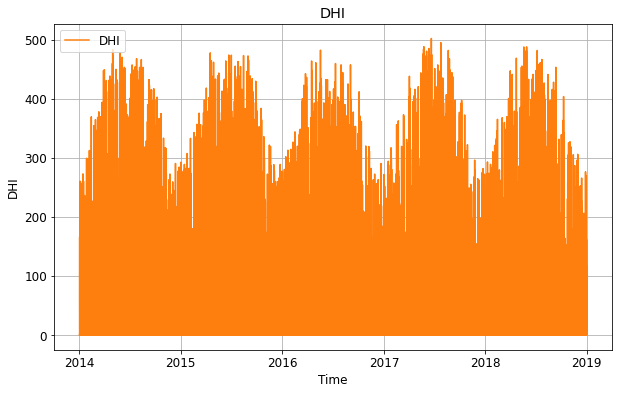

In [14]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df.DHI, color='tab:orange', label='DHI')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('DHI')
ax.set_title('DHI')
ax.grid(True)
ax.legend(loc='upper left');

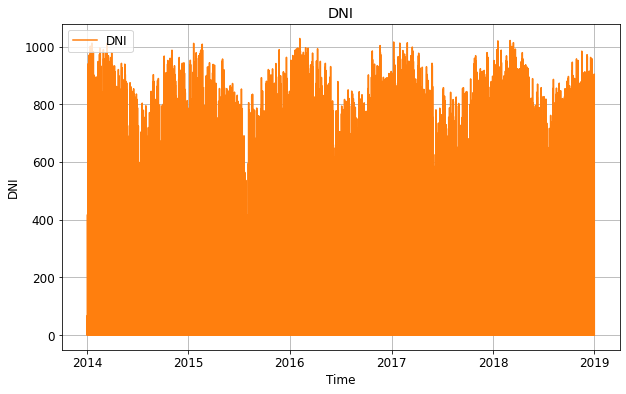

In [15]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df.DNI, color='tab:orange', label='DNI')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('DNI')
ax.set_title('DNI')
ax.grid(True)
ax.legend(loc='upper left');

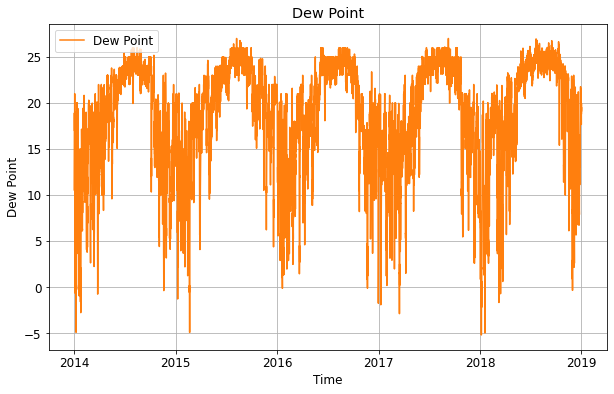

In [16]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Dew Point'], color='tab:orange', label='Dew Point')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Dew Point')
ax.set_title('Dew Point')
ax.grid(True)
ax.legend(loc='upper left');

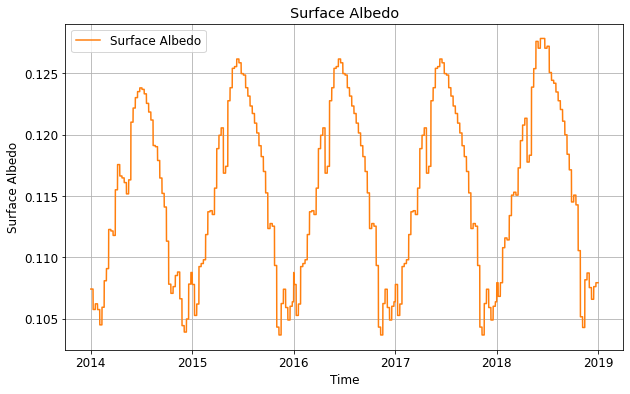

In [17]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Surface Albedo'], color='tab:orange', label='Surface Albedo')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Surface Albedo')
ax.set_title('Surface Albedo')
ax.grid(True)
ax.legend(loc='upper left');

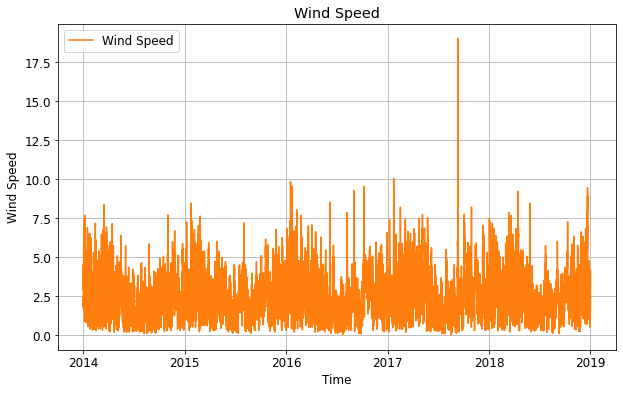

In [18]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Wind Speed'], color='tab:orange', label='Wind Speed')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Wind Speed')
ax.set_title('Wind Speed')
ax.grid(True)
ax.legend(loc='upper left');

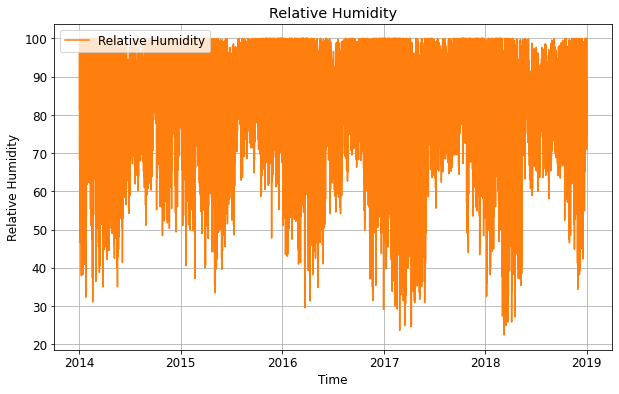

In [19]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Relative Humidity'], color='tab:orange', label='Relative Humidity')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Relative Humidity')
ax.set_title('Relative Humidity')
ax.grid(True)
ax.legend(loc='upper left');

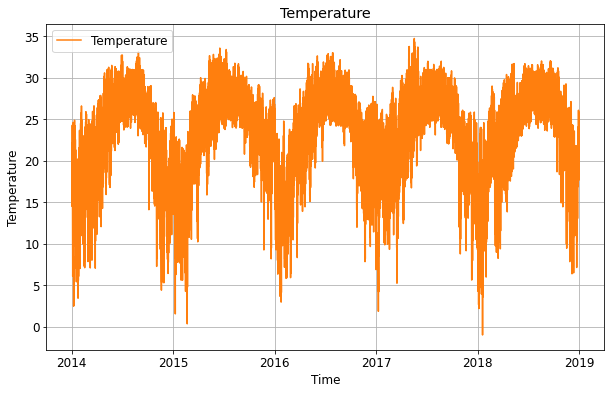

In [20]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Temperature'], color='tab:orange', label='Temperature')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature')
ax.grid(True)
ax.legend(loc='upper left');

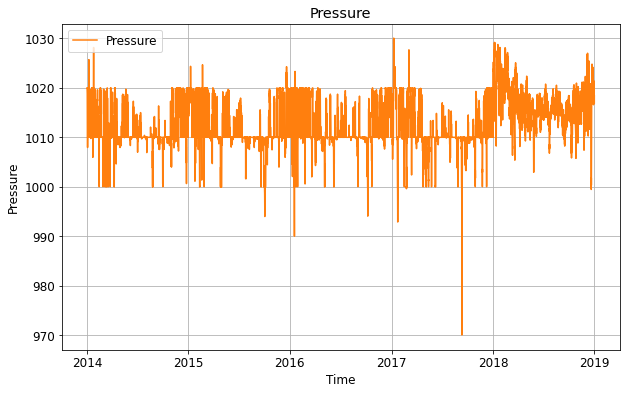

In [21]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(df.date_time, df['Pressure'], color='tab:orange', label='Pressure')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
ax.set_title('Pressure')
ax.grid(True)
ax.legend(loc='upper left');

In [23]:
df.head()

Year  Month  Day  Hour  Minute   DHI   DNI  Dew Point  Surface Albedo  \
0  2014      1    1     0      30 0.000 0.000     10.548           0.107   
1  2014      1    1     1      30 0.000 0.000     11.048           0.107   
2  2014      1    1     2      30 0.000 0.000     11.183           0.107   
3  2014      1    1     3      30 0.000 0.000     12.000           0.107   
4  2014      1    1     4      30 0.000 0.000     12.016           0.107   

   Wind Speed  Relative Humidity  Temperature  Pressure  Unnamed: 13  \
0       2.964             68.401       16.968  1020.000          NaN   
1       2.957             73.235       16.341  1020.000          NaN   
2       2.957             75.846       16.135  1020.000          NaN   
3       3.050             78.670       15.984  1020.000          NaN   
4       3.050             82.956       15.579  1020.000          NaN   

            date_time  
0 2014-01-01 00:30:00  
1 2014-01-01 01:30:00  
2 2014-01-01 02:30:00  
3 2014-01-01 03:30:00  
4 2014-01-01 04:30:00

In [16]:
subset = df[['Year','Month','Day','DHI','DNI','Dew Point','Surface Albedo','Wind Speed','Relative Humidity','Temperature','Pressure']]

In [17]:
# upsample weather_train dataframe to get daily means
weather_daily = subset.groupby(['Year','Month','Day']).mean()

In [18]:
weather_daily = weather_daily.reset_index()

In [19]:
weather_daily.head()

Year  Month  Day    DHI     DNI  Dew Point  Surface Albedo  Wind Speed  \
0  2014      1    1 33.821   3.479     14.730           0.107       3.339   
1  2014      1    2 61.916  79.469     18.635           0.107       3.539   
2  2014      1    3 38.559 250.445      5.317           0.107       5.912   
3  2014      1    4 57.479  30.674      7.463           0.107       3.292   
4  2014      1    5 35.460 267.702     15.885           0.107       2.060   

   Relative Humidity  Temperature  Pressure  
0             87.795       17.396  1017.163  
1             95.755       19.658  1009.593  
2             71.567       10.786  1015.066  
3             80.124       11.475  1017.110  
4             88.521       18.438  1010.579

In [20]:
weather_daily['date_time'] = pd.to_datetime(weather_daily[['Year', 'Month', 'Day']])

In [21]:
ferc714_hourly_demand_tampa.head(10)

Unnamed: 0  respondent_id_ferc714          report_date  \
0      426228                    262  2014-01-01 00:00:00   
1     1046371                    262  2014-01-01 00:00:00   
2     1666514                    262  2014-01-01 00:00:00   
3     2286657                    262  2014-01-01 00:00:00   
4     2906800                    262  2014-01-01 00:00:00   
5     3526943                    262  2014-01-01 00:00:00   
6     4147086                    262  2014-01-01 00:00:00   
7     4767229                    262  2014-01-01 00:00:00   
8     5387372                    262  2014-01-01 00:00:00   
9     6007515                    262  2014-01-01 00:00:00   

          utc_datetime          timezone  demand_mwh  
0  2014-01-01 05:00:00  America/New_York    1510.000  
1  2014-01-01 06:00:00  America/New_York    1428.000  
2  2014-01-01 07:00:00  America/New_York    1378.000  
3  2014-01-01 08:00:00  America/New_York    1324.000  
4  2014-01-01 09:00:00  America/New_York    1326.000  
5  2014-01-01 10:00:00  America/New_York    1347.000  
6  2014-01-01 11:00:00  America/New_York    1387.000  
7  2014-01-01 12:00:00  America/New_York    1396.000  
8  2014-01-01 13:00:00  America/New_York    1485.000  
9  2014-01-01 14:00:00  America/New_York    1623.000

In [23]:
ferc714_hourly_demand_tampa.utc_datetime = pd.to_datetime(ferc714_hourly_demand_tampa.utc_datetime)

In [24]:
#ferc714_hourly_demand_tampa = ferc714_hourly_demand_tampa.reset_index()

In [25]:
ferc714_hourly_demand_tampa.head()

Unnamed: 0  respondent_id_ferc714          report_date        utc_datetime  \
0      426228                    262  2014-01-01 00:00:00 2014-01-01 05:00:00   
1     1046371                    262  2014-01-01 00:00:00 2014-01-01 06:00:00   
2     1666514                    262  2014-01-01 00:00:00 2014-01-01 07:00:00   
3     2286657                    262  2014-01-01 00:00:00 2014-01-01 08:00:00   
4     2906800                    262  2014-01-01 00:00:00 2014-01-01 09:00:00   

           timezone  demand_mwh  
0  America/New_York    1510.000  
1  America/New_York    1428.000  
2  America/New_York    1378.000  
3  America/New_York    1324.000  
4  America/New_York    1326.000

In [26]:
#ferc714_daily_demand_tampa= ferc714_hourly_demand_tampa.groupby(by=[ferc714_hourly_demand_tampa.index.year, ferc714_hourly_demand_tampa.index.month, ferc714_hourly_demand_tampa.index.day])
#ferc714_daily_demand_tampa= ferc714_hourly_demand_tampa.groupby(pd.Grouper(freq='D'))
ferc714_daily_demand_tampa = ferc714_hourly_demand_tampa.resample('D', on='utc_datetime').sum()
ferc714_daily_demand_tampa = ferc714_daily_demand_tampa.reset_index()


In [27]:
ferc714_daily_demand_tampa.tail()

utc_datetime  Unnamed: 0  respondent_id_ferc714  demand_mwh
2187   2019-12-28   185762479                   6288   46087.000
2188   2019-12-29   185762503                   6288   48421.000
2189   2019-12-30   185762527                   6288   49408.000
2190   2019-12-31   185762551                   6288   44659.000
2191   2020-01-01    68157325                   1310    9422.000

In [28]:
ferc714_daily_demand_tampa.shape

(2192, 4)

In [29]:
ferc714_daily_demand_tampa.drop('Unnamed: 0', axis = 1, inplace = True)

In [30]:
ferc714_daily_demand_tampa.to_csv('tampa_ferc714_daily_demand.csv', index = False)

In [31]:
weather_daily.tail()

Year  Month  Day    DHI     DNI  Dew Point  Surface Albedo  Wind Speed  \
1820  2018     12   27 67.976  72.869     16.999           0.108       4.009   
1821  2018     12   28 67.517 106.310     20.407           0.108       3.055   
1822  2018     12   29 55.425 170.006     20.161           0.108       1.369   
1823  2018     12   30 35.595 267.504     19.824           0.108       1.410   
1824  2018     12   31 36.626 270.401     18.961           0.108       2.694   

      Relative Humidity  Temperature  Pressure  date_time  
1820             87.714       19.125  1019.800 2018-12-27  
1821             95.513       21.180  1017.684 2018-12-28  
1822             91.358       21.752  1019.271 2018-12-29  
1823             89.514       21.747  1019.088 2018-12-30  
1824             89.370       20.905  1018.889 2018-12-31

In [32]:
weather_daily.shape

(1825, 12)

In [33]:
weather_daily.to_csv('tampa_weather_daily_2014-2018.csv', index = False)

In [34]:
weather_vs_demand_reading = (ferc714_daily_demand_tampa.
                            merge(weather_daily, 
                                  left_on='utc_datetime',
                                  right_on= 'date_time',
                                  how='left'))

In [35]:
weather_vs_demand_reading.shape

(2192, 15)

In [36]:
weather_vs_demand_reading.columns

Index(['utc_datetime', 'respondent_id_ferc714', 'demand_mwh', 'Year', 'Month',
       'Day', 'DHI', 'DNI', 'Dew Point', 'Surface Albedo', 'Wind Speed',
       'Relative Humidity', 'Temperature', 'Pressure', 'date_time'],
      dtype='object')

In [37]:
# create weather variables and color dictionary
weather_dict = {"Temperature": "red",
                "Pressure": "orange",
                "Dew Point": "coral",
                "Surface Albedo": "olive",
                "Relative Humidity": "teal",
                "DHI": "purple",
                "Wind Speed": "navy",
                "DNI": "green"
               }

/Users/anniecondon/anaconda3/envs/discovery/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




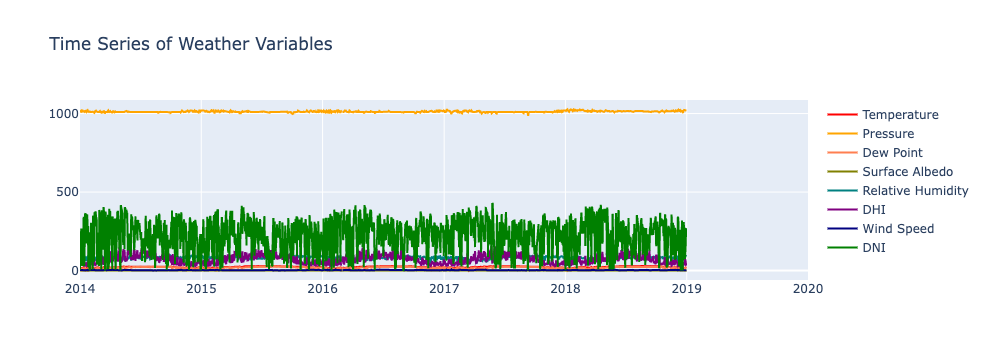

In [38]:
# create plotly object and plot weather variables against dates
fig = go.Figure()
    
for key in weather_dict:
    fig.add_trace(go
                  .Line(x=weather_vs_demand_reading['utc_datetime'],
                        y=weather_vs_demand_reading[key], 
                        name=key,
                        line_color=weather_dict[key]))
    
fig.update_layout(title_text='Time Series of Weather Variables')
fig.show()  

In [39]:
weather_vs_demand_reading.columns

Index(['utc_datetime', 'respondent_id_ferc714', 'demand_mwh', 'Year', 'Month',
       'Day', 'DHI', 'DNI', 'Dew Point', 'Surface Albedo', 'Wind Speed',
       'Relative Humidity', 'Temperature', 'Pressure', 'date_time'],
      dtype='object')

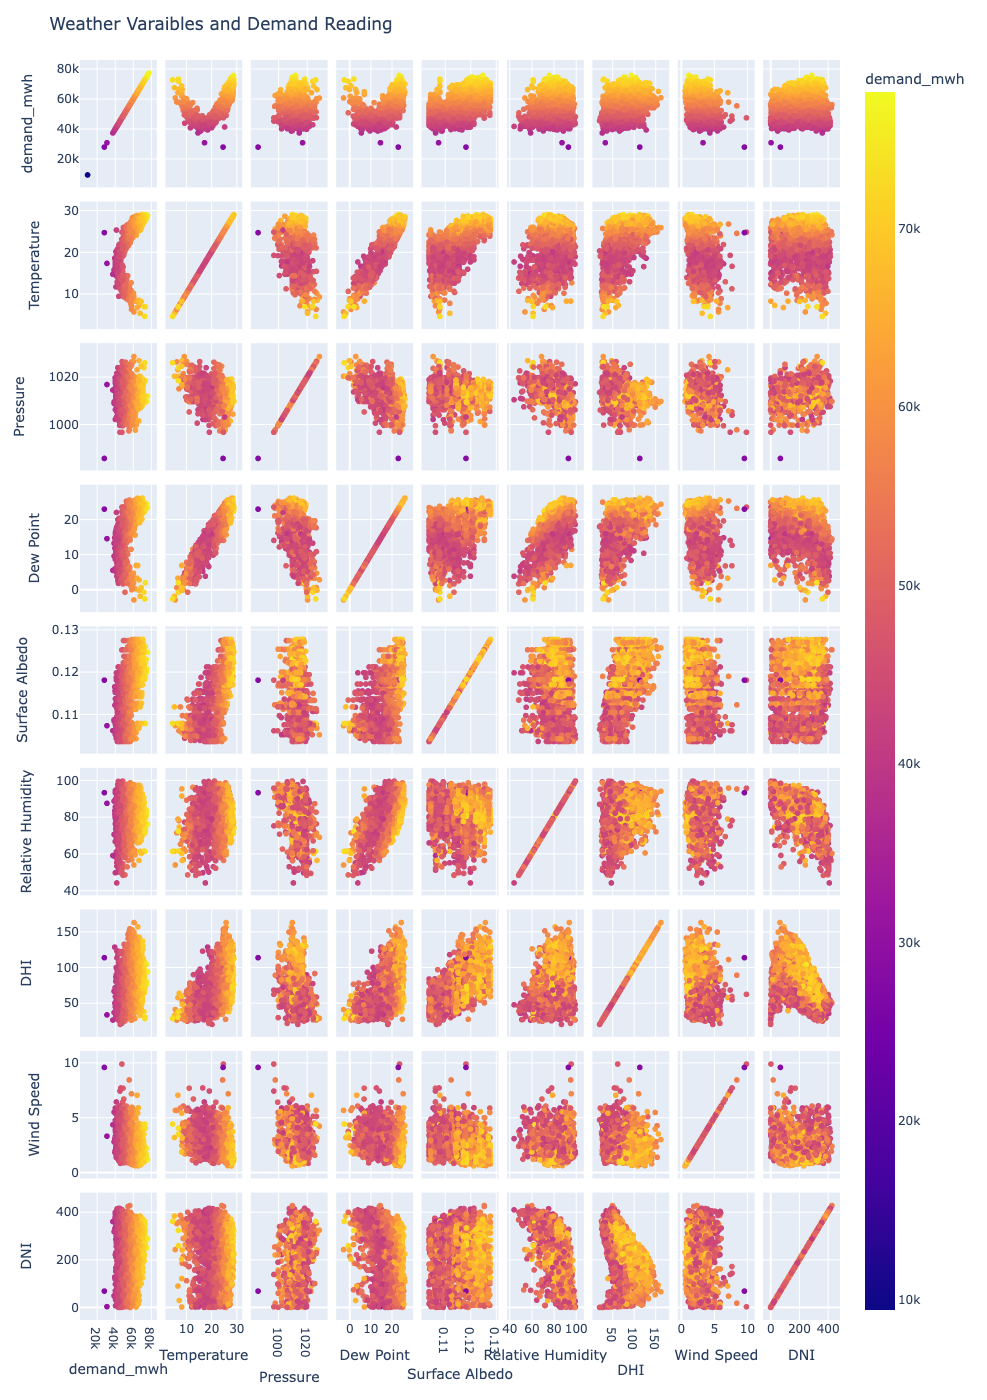

In [40]:
fig = px.scatter_matrix(weather_vs_demand_reading,
                        dimensions=["demand_mwh",
                                    "Temperature",
                                    "Pressure",
                                    "Dew Point",
                                    "Surface Albedo",
                                    "Relative Humidity",
                                    "DHI",
                                    "Wind Speed",
                                    "DNI"],
                        color="demand_mwh")

fig.update_layout(
    title='Weather Varaibles and Demand Reading',
    dragmode='select',
    width=1400,
    height=1400,
    hovermode='closest')

fig.update_traces(diagonal_visible=True)
fig.show()